In [1]:
import pandas as pd
from tqdm import tqdm
from googleapiclient.discovery import build
import re

In [242]:
def collect_comments (video_list, result_list, api_key) :
    
    #tqdm Ï†ÅÏö©
    video_list = tqdm(video_list)

    # api Ïó∞Í≤∞
    api_obj = build ('youtube', 'v3', developerKey = api_key)
    
    # Í∞Å videoÏùò ÎåìÍ∏ÄÏù¥ Ïûò Ìï©Ï≥êÏ°åÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú 
    shape_count = list()
    
    for video in video_list:
        video_id = video[17:] 
        video_list.set_description ("Collecting Comments from youtube....")
        response = api_obj.commentThreads().list(part='snippet,replies',
                                         videoId = video_id, 
                                        maxResults = 100). execute()
        # Í∞Å ÎπÑÎîîÏò§Ïùò ÎåìÍ∏Ä 
        comments = list()
        while response:
            for item in response['items']:
                comment = item['snippet']['topLevelComment']['snippet']
                comments.append([comment['textDisplay'], comment['publishedAt'],comment['likeCount']])

                if item['snippet']['totalReplyCount']>0:
                    for reply_item in item['replies']['comments']:
                        reply = reply_item['snippet']
                        comments.append([reply])
                        comments.append([reply['textDisplay'], reply['publishedAt'], reply['likeCount']])

            # page ÎÑòÍ≤®Í∞ÄÎ©¥ÏÑú ÎåìÍ∏Ä Ï°∞Ìöå 
            if 'nextPageToken' in response:
                response = api_obj.commentThreads().list(part='snippet,replies', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
            else:
                break

        # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Ïñ¥Ï£ºÍ∏∞ 
        df = pd.DataFrame(comments, columns = ["comment","datetime","like_count"])
        # na Í∞í Ï†úÍ±∞
        df = df.dropna(axis=0)
        
        # Í∞Å ÎπÑÎîîÏò§Î≥Ñ ÏûêÎ£åÍ∞úÏàò ÌååÏïÖ
        print(f"{video_id} :  {df.shape}")
        # Ìï©Í≥ÑÌï† Î¶¨Ïä§Ìä∏Ïóê ÏÇΩÏûÖ
        shape_count.append(df.shape[0])

        # ÏµúÏ¢Ö dfÎ°ú ÎßåÎì§Í∏∞ Ï†ÑÏóê Î¶¨Ïä§Ìä∏Ïóê ÏÇΩÏûÖ
        result_list.append(df)
        
    # ÏµúÏ¢Ö dfÎ°ú Ìï©Ï≥êÏ£ºÍ∏∞ 
    result_list = pd.concat(result_list,ignore_index=True)

    if sum(shape_count) == result_list.shape[0]:
        print("Ìï©Í≥ÑÍ∞Ä ÏùºÏπòÌï©ÎãàÎã§.")
        return result_list
    else:
        print(f"sum : {sum(shape_count)} / {result_list.shape[0]} Ìï©Í≥ÑÍ∞Ä ÏùºÏπòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return result_list

    

    

In [246]:
## Î∞úÍ∏âÎ∞õÏùÄ youtube_apikey
api_key = "Î∞úÍ∏âÎ∞õÏùÄ youtube_apikey"

In [244]:
video_list_battle = ["https://youtu.be/zDN1ygokMs0"]
video_list_collabo = ["https://youtu.be/eaCoxnpPcuM"]


In [247]:
comment_battle = []

df_battle = collect_comments (video_list_battle, comment_battle, api_key)

zDN1ygokMs0 :  (648, 3)
Ìï©Í≥ÑÍ∞Ä ÏùºÏπòÌï©ÎãàÎã§.


In [249]:
comment_test = []
list_test = ["https://youtu.be/CloDtGJysWk","https://youtu.be/wm-0AlTUTXk"]

df_test = collect_comments (list_test, comment_test, api_key)

CloDtGJysWk :  (603, 3)


wm-0AlTUTXk :  (2167, 3)
Ìï©Í≥ÑÍ∞Ä ÏùºÏπòÌï©ÎãàÎã§.


In [252]:
print(df_test.shape)
df_test.head()


(2770, 3)


comment              datetime  \
0                                                Î©ãÏûàÎã§  2021-12-19T06:12:19Z   
1  Ï†úÍ∞Ä Ïó∞Í∏∞Î•º Ïûò Î™®Î•¥ÏßÄÎßå ÌïòÎÇòÎäî ÏïåÍ≤†ÏäµÎãàÎã§ Ï∞∏ ÎßõÏûàÍ≤å Ïó∞Í∏∞Î•º ÌïòÏã†Îã§ÎäîÍ±∞...ÏùëÏõêÌï†ÍªòÏöî!!  2021-12-19T06:10:20Z   
2                        40Ïù∏Îç∞ Ï£ºÎ¶ÑÏù¥ Í±∞Ïùò ÏóÜÎÑ§Ïöî..?.!?!?!?!?  2021-12-19T06:07:59Z   
3  Íµ¨ÍµêÌôòÏî® Î™©ÏÜåÎ¶¨ ÎÑàÎ¨¥Îß§Î†•Ï†Å...^^<br>ÍπÄÏ§ÄÏàòÏî®Îûë Ï¢Ä ÎπÑÏä∑ÌïòÍ∏∞ÎèÑ Ìï¥Ïöî~^^ÌóàÏä§ÌÇ§Ìïò...  2021-12-19T06:06:40Z   
4                                 ÏïÑ Í∑ºÎç∞ Ïû†Íπê ÎπÑÏπú Ï°∞Ïù∏ÏÑ± Ï°¥Ïûò‚Ä¶  2021-12-19T06:06:23Z   

   like_count  
0         1.0  
1         1.0  
2         0.0  
3         1.0  
4         0.0

In [162]:
comment_collabo = []

df_collabo = collect_comments (video_list_colaborate, comment_collabo, api_key)

eaCoxnpPcuM :  (581, 3)
Ìï©Í≥ÑÍ∞Ä ÏùºÏπòÌï©ÎãàÎã§.


In [163]:
print(df_battle.shape)
df_battle.head()


(636, 3)


comment              datetime  \
0  <a href="https://www.youtube.com/watch?v=zDN1y...  2021-12-15T18:22:51Z   
1  <a href="https://www.youtube.com/watch?v=zDN1y...  2021-12-15T11:02:25Z   
2  <a href="https://www.youtube.com/watch?v=zDN1y...  2021-12-15T10:30:18Z   
3  Ïã¨ÌåêÏ†úÎ∞ú  ÎÇ®ÏûêÎì§ ÏóÜÏï†Îùº!..Í∞ôÏùÄ Ïó¨ÏûêÎÅºÎ¶¨  Ïù∏Ï†ïÏãúÏºú!  ÏÑπÏãúÍ≥†Î≠êÍ≥†  Îö±ÎóëÏù¥ ÌùîÎì§ÏßÄ...  2021-12-14T19:21:06Z   
4  Ï≤úÏÇ¨ ÏïÑÏù¥ÌÇ§! Í∞ÄÎπÑ Í∞ôÏùÄÌùêÎäêÏ†ÅÏ∂§„Öã„Öã ÏßïÍ∑∏ÎüΩÏßÄ...Í∑ºÎç∞ ÏßÑÏã¨ Î™ªÏÉùÍπÄ..„Öà„ÖÖ„Öã„ÖãÏñ¥ÎîîÍ∞ÄÏÑú...  2021-12-14T18:59:03Z   

   like_count  
0         0.0  
1         1.0  
2         0.0  
3         1.0  
4         1.0

In [164]:
print(df_collabo.shape)
df_collabo.head()


(581, 3)


comment              datetime  \
0                                ÏïÑÏù¥ÌÇ§ ÎÖ∏ÎûÄÏõêÌîºÏä§ ÎÑàÎ¨¥ Í∑ÄÏóΩÎã§ Ï¶ùÎßê  2021-12-08T15:25:39Z   
1                         ÌóàÎãàÏ†úÏù¥ ÏôúÏºÄ Í∑ÄÏó¨ÏõÄ „Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã  2021-12-05T11:19:59Z   
2  <a href="https://www.youtube.com/watch?v=eaCox...  2021-12-02T07:43:45Z   
3                                     Î™áÎ≤àÏùÑ Î¥ê Ïù¥Í≤å Î≠êÎùºÍ≥†..  2021-12-01T12:51:15Z   
4             ÏïÑÏù¥ÎπÑ Ï°∞Ìï© ÎÑàÎ¨¥ Ï¢ãÎã§..Ï£ºÎ≥ÄÏóêÏÑú Îã§Îì§ ÏõÉÍ≥† Ï¶êÍ∏∞Îäî Î∂ÑÏúÑÍ∏∞Îùº Îçî Ï¢ãÏùå  2021-11-26T18:46:08Z   

   like_count  
0         0.0  
1         0.0  
2         1.0  
3         0.0  
4         3.0

In [165]:
df_battle_sorted = df_battle.sort_values(by=['datetime'],axis=0)
df_battle_sorted.head(10)

comment              datetime  \
635                                       Ïã∏Ïö∞ÏßÄÎßà... ÏÑπÏãúÌïòÎÑ§  2021-10-02T02:34:39Z   
634                                         Ïó≠Ïãú ÏµúÍ≥†Ïùò ÏàòÏû•Îì§  2021-10-02T02:59:49Z   
633                  Ïù¥Îü¨Í≥† Ïù¥Ï†ú Í∞ÄÎπÑ ÎãòÏù¥Îûë ÏïÑÏù¥ÌÇ§ Îãò ÏÇ¨Ïù¥ Ï¢ãÏùÄ Í≤å ÎÑàÎ¨¥ Ï¢ãÎã§  2021-10-02T03:00:54Z   
632                             ÏïÑ Ï†ÄÎü¨Í≥† ÎëòÏù¥ ÏπúÌïòÍ≤å ÎÑò ÏõÉÍ∏∞Îã§Í≥† ..  2021-10-02T03:22:23Z   
631                                           Îî∞Î¥âÎ∂ÄÌÑ∞ Ïù¥Í≤ºÎã§  2021-10-02T04:06:01Z   
630  Í∞ÄÎπÑ Ïû¨ÎåÄÍ≤∞ Ìï†Îïå ÎèôÏÑ† ÎÑàÎ¨¥ ÏÑºÌÑ∞ÏóêÏÑú ÏïàÎπÑÏºúÏ£ºÎÑ§„Öã„Öã„Öã„Öã„Öã<br>Ïù¥Í∏∏Î†§Í≥† Ïù¥Í∞ÄÎäî Î™®Ïäµ...  2021-10-02T04:30:19Z   
627                        Ïù¥ Î¨¥ÎåÄ Î≥¥Í≥† ÏïÑÏù¥ÌÇ§ Ìå¨Îê® Ìó§Ïñ¥ÎÇòÏò¨ Ïàò ÏóÖÎã§..„Ö†  2021-10-02T04:53:20Z   
624                    ÏïÑÏù¥ÌÇ§ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏùå „Öú„Ö†„Ö†„Ö† ÌÑ∞ÏπòÎßàÏù¥Î∞îÎîî Ï†ÄÍ±∏ ÏÇ¥Î¶¨ÎÑ§  2021-10-02T05:05:34Z   
623                                   Í∑∏ÎûòÎèÑ ÎëòÎã§ Í∑ÄÏó¨Ïõå„Ö†„Ö†„Ö†„Ö†„Ö†„Ö†  2021-10-02T05:10:29Z   
622                             Í≥ÑÎã®Ïò¨ÎùºÍ∞ÄÏÑú Î®∏Î¶¨ÌùîÎì†Í±∏Î°ú Ïù¥Í∏¥Í±∞ÏûÑ? „Öã„Öã  2021-10-02T05:19:23Z   

     like_count  
635        11.0  
634        26.0  
633       327.0  
632       277.0  
631        47.0  
630        66.0  
627       642.0  
624      1134.0  
623        27.0  
622        55.0

In [166]:
df_collabo_sorted = df_collabo.sort_values(by=['datetime'],axis=0)
df_collabo_sorted.head(10)

comment              datetime  \
580                                     ÎÑàÎ¨¥ Ï¢ãÎã§...„Ö†  2021-11-16T02:14:46Z   
579                                  ÎÑàÎ¨¥ ÏûòÏñ¥Ïö∏Î¶∞Îã§„Öè„Öã„Öãüëç  2021-11-16T02:15:01Z   
578                                      Ïó≠Ïãú ÏûòÌïúÎã§üëçüëç  2021-11-16T02:22:42Z   
577                Ïïú„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã  ÏßÑÏßú „Ñπ„Öà„Ñ∑ ÏÇ¨ÎûëÌï¥Ïöî ü§£ü§£  2021-11-16T02:22:47Z   
575                               ÏïÑÏù¥ÎπÑ...Ïù¥Í±∞ ÎêòÎäîÏ°∞Ìï©Ïù¥Îã§  2021-11-16T02:23:43Z   
574     ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÎã§ ÏßÑÏã¨ Í∑∏ÎÉ• Ï¢ãÎã§„Ö†„Ö†„Ö†„Ö†ÎÑàÎ¨¥ Í∞êÎèôÏ†ÅÏù¥Í≥† Í±ç ÎÑàÎ¨¥ Ï¢ãÎã§ Î≤ÖÏ∞®Îã§  2021-11-16T02:24:27Z   
573                        Ïä§Ïö∞ÌååÏùò ÌïòÏôÄÏàò!! Ïó≠Ïãú Ïûò ÎßûÎäîÍµ∞!„Öé„Öé  2021-11-16T02:24:27Z   
572   ÎÖ∏Îûë ÏïÑÏù¥ÌÇ§ ÏßÑÏßú ÏÜêÍ∞ÄÎùΩ ÏûêÍæ∏ Íπ®Î¨ºÎûò? ÏïÑÏù¥ÌÇ§ ÏïÑÏù¥Ïø†! ÏÇ¨ÎûëÏä§Îü¨Ïõå ~~~~~~  2021-11-16T02:24:33Z   
571                              Ïä§Ïö∞ÌååÍ≥µÏó∞ ÎÑàÎ¨¥ Í∏∞ÎåÄÎêòÏöî~~‚ô°  2021-11-16T02:25:14Z   
570  Ïù¥ Ïñ∏Îãà ÎòêÏôúÏù¥ÎûòÏöî.....Í∑∏ÎßåÍº¨ÏãúÍ≥†Îã§ÎÖÄ!!!<br>Ïò§Î¶¨Í∞Ä ÎÖ∏ÎûÄÏò∑ÍπåÏßÄÏûÖÍ≥†ÏÑ†...  2021-11-16T02:26:19Z   

     like_count  
580        11.0  
579        23.0  
578        12.0  
577        17.0  
575        76.0  
574        13.0  
573        11.0  
572        19.0  
571        27.0  
570        38.0

In [167]:
df_battle_sorted['comment'] = [re.sub('[^0-9Í∞Ä-Ìû£ ]', '', s) for s in df_battle_sorted['comment']]

df_battle_sorted[:10]

comment              datetime  \
635                                          Ïã∏Ïö∞ÏßÄÎßà ÏÑπÏãúÌïòÎÑ§  2021-10-02T02:34:39Z   
634                                         Ïó≠Ïãú ÏµúÍ≥†Ïùò ÏàòÏû•Îì§  2021-10-02T02:59:49Z   
633                  Ïù¥Îü¨Í≥† Ïù¥Ï†ú Í∞ÄÎπÑ ÎãòÏù¥Îûë ÏïÑÏù¥ÌÇ§ Îãò ÏÇ¨Ïù¥ Ï¢ãÏùÄ Í≤å ÎÑàÎ¨¥ Ï¢ãÎã§  2021-10-02T03:00:54Z   
632                               ÏïÑ Ï†ÄÎü¨Í≥† ÎëòÏù¥ ÏπúÌïòÍ≤å ÎÑò ÏõÉÍ∏∞Îã§Í≥†   2021-10-02T03:22:23Z   
631                                           Îî∞Î¥âÎ∂ÄÌÑ∞ Ïù¥Í≤ºÎã§  2021-10-02T04:06:01Z   
630  Í∞ÄÎπÑ Ïû¨ÎåÄÍ≤∞ Ìï†Îïå ÎèôÏÑ† ÎÑàÎ¨¥ ÏÑºÌÑ∞ÏóêÏÑú ÏïàÎπÑÏºúÏ£ºÎÑ§Ïù¥Í∏∏Î†§Í≥† Ïù¥Í∞ÄÎäî Î™®ÏäµÏù∏Í±∞ Í∞ôÏùÄÎç∞Í∑∏ÎûòÎèÑ...  2021-10-02T04:30:19Z   
627                           Ïù¥ Î¨¥ÎåÄ Î≥¥Í≥† ÏïÑÏù¥ÌÇ§ Ìå¨Îê® Ìó§Ïñ¥ÎÇòÏò¨ Ïàò ÏóÖÎã§  2021-10-02T04:53:20Z   
624                        ÏïÑÏù¥ÌÇ§ ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÏùå  ÌÑ∞ÏπòÎßàÏù¥Î∞îÎîî Ï†ÄÍ±∏ ÏÇ¥Î¶¨ÎÑ§  2021-10-02T05:05:34Z   
623                                         Í∑∏ÎûòÎèÑ ÎëòÎã§ Í∑ÄÏó¨Ïõå  2021-10-02T05:10:29Z   
622                                Í≥ÑÎã®Ïò¨ÎùºÍ∞ÄÏÑú Î®∏Î¶¨ÌùîÎì†Í±∏Î°ú Ïù¥Í∏¥Í±∞ÏûÑ   2021-10-02T05:19:23Z   

     like_count  
635        11.0  
634        26.0  
633       327.0  
632       277.0  
631        47.0  
630        66.0  
627       642.0  
624      1134.0  
623        27.0  
622        55.0

In [168]:
df_collabo_sorted['comment'] = [re.sub('[^0-9Í∞Ä-Ìû£ ]', '', s) for s in df_collabo_sorted['comment']]

df_collabo_sorted[:10]

comment              datetime  like_count
580                                  ÎÑàÎ¨¥ Ï¢ãÎã§  2021-11-16T02:14:46Z        11.0
579                               ÎÑàÎ¨¥ ÏûòÏñ¥Ïö∏Î¶∞Îã§  2021-11-16T02:15:01Z        23.0
578                                 Ïó≠Ïãú ÏûòÌïúÎã§  2021-11-16T02:22:42Z        12.0
577                           Ïïú  ÏßÑÏßú  ÏÇ¨ÎûëÌï¥Ïöî   2021-11-16T02:22:47Z        17.0
575                           ÏïÑÏù¥ÎπÑÏù¥Í±∞ ÎêòÎäîÏ°∞Ìï©Ïù¥Îã§  2021-11-16T02:23:43Z        76.0
574  ÏßÑÏßú ÎÑàÎ¨¥ Ï¢ãÎã§ ÏßÑÏã¨ Í∑∏ÎÉ• Ï¢ãÎã§ÎÑàÎ¨¥ Í∞êÎèôÏ†ÅÏù¥Í≥† Í±ç ÎÑàÎ¨¥ Ï¢ãÎã§ Î≤ÖÏ∞®Îã§  2021-11-16T02:24:27Z        13.0
573                      Ïä§Ïö∞ÌååÏùò ÌïòÏôÄÏàò Ïó≠Ïãú Ïûò ÎßûÎäîÍµ∞  2021-11-16T02:24:27Z        11.0
572    ÎÖ∏Îûë ÏïÑÏù¥ÌÇ§ ÏßÑÏßú ÏÜêÍ∞ÄÎùΩ ÏûêÍæ∏ Íπ®Î¨ºÎûò ÏïÑÏù¥ÌÇ§ ÏïÑÏù¥Ïø† ÏÇ¨ÎûëÏä§Îü¨Ïõå   2021-11-16T02:24:33Z        19.0
571                          Ïä§Ïö∞ÌååÍ≥µÏó∞ ÎÑàÎ¨¥ Í∏∞ÎåÄÎêòÏöî  2021-11-16T02:25:14Z        27.0
570          Ïù¥ Ïñ∏Îãà ÎòêÏôúÏù¥ÎûòÏöîÍ∑∏ÎßåÍº¨ÏãúÍ≥†Îã§ÎÖÄÏò§Î¶¨Í∞Ä ÎÖ∏ÎûÄÏò∑ÍπåÏßÄÏûÖÍ≥†ÏÑ†  2021-11-16T02:26:19Z        38.0

In [172]:
## Ï§ëÎ≥µ Ï†úÍ±∞ 

df_battle_sorted.drop_duplicates()

df_battle = df_battle_sorted

df_battle.head()

comment              datetime  like_count
635                          Ïã∏Ïö∞ÏßÄÎßà ÏÑπÏãúÌïòÎÑ§  2021-10-02T02:34:39Z        11.0
634                         Ïó≠Ïãú ÏµúÍ≥†Ïùò ÏàòÏû•Îì§  2021-10-02T02:59:49Z        26.0
633  Ïù¥Îü¨Í≥† Ïù¥Ï†ú Í∞ÄÎπÑ ÎãòÏù¥Îûë ÏïÑÏù¥ÌÇ§ Îãò ÏÇ¨Ïù¥ Ï¢ãÏùÄ Í≤å ÎÑàÎ¨¥ Ï¢ãÎã§  2021-10-02T03:00:54Z       327.0
632               ÏïÑ Ï†ÄÎü¨Í≥† ÎëòÏù¥ ÏπúÌïòÍ≤å ÎÑò ÏõÉÍ∏∞Îã§Í≥†   2021-10-02T03:22:23Z       277.0
631                           Îî∞Î¥âÎ∂ÄÌÑ∞ Ïù¥Í≤ºÎã§  2021-10-02T04:06:01Z        47.0

In [240]:
df_collabo_sorted = df_collabo_sorted.drop_duplicates()

df_collabo = df_collabo_sorted

df_collabo.head()

NameError: name 'df_collabo_sorted' is not defined

In [239]:
df_battle = df_battle.dropna()

df_battle.head()

comment label  like_count
datetime                                                                
2021-10-02 02:34:39                          Ïã∏Ïö∞ÏßÄÎßà ÏÑπÏãúÌïòÎÑ§   5.0        11.0
2021-10-02 02:59:49                         Ïó≠Ïãú ÏµúÍ≥†Ïùò ÏàòÏû•Îì§   5.0        26.0
2021-10-02 03:00:54  Ïù¥Îü¨Í≥† Ïù¥Ï†ú Í∞ÄÎπÑ ÎãòÏù¥Îûë ÏïÑÏù¥ÌÇ§ Îãò ÏÇ¨Ïù¥ Ï¢ãÏùÄ Í≤å ÎÑàÎ¨¥ Ï¢ãÎã§   5.0       327.0
2021-10-02 03:22:23               ÏïÑ Ï†ÄÎü¨Í≥† ÎëòÏù¥ ÏπúÌïòÍ≤å ÎÑò ÏõÉÍ∏∞Îã§Í≥†    5.0       277.0
2021-10-02 04:06:01                           Îî∞Î¥âÎ∂ÄÌÑ∞ Ïù¥Í≤ºÎã§   3.0        47.0

In [175]:

df_collabo.isnull().sum()
df_collabo.dropna()

comment              datetime  like_count
580                        ÎÑàÎ¨¥ Ï¢ãÎã§  2021-11-16T02:14:46Z        11.0
579                     ÎÑàÎ¨¥ ÏûòÏñ¥Ïö∏Î¶∞Îã§  2021-11-16T02:15:01Z        23.0
578                       Ïó≠Ïãú ÏûòÌïúÎã§  2021-11-16T02:22:42Z        12.0
577                 Ïïú  ÏßÑÏßú  ÏÇ¨ÎûëÌï¥Ïöî   2021-11-16T02:22:47Z        17.0
575                 ÏïÑÏù¥ÎπÑÏù¥Í±∞ ÎêòÎäîÏ°∞Ìï©Ïù¥Îã§  2021-11-16T02:23:43Z        76.0
..                           ...                   ...         ...
2       106106 ÏïÑÏù¥ÌÇ§ Ïñ∏Îãà ÏûÖÏà† Íπ®Î¨¥ÎäîÍ±∞ Î≠êÏïº  2021-12-02T07:43:45Z         1.0
504                         Í¥úÏ∞ÆÏïÑÏöî  2021-12-05T10:08:57Z         1.0
1                   ÌóàÎãàÏ†úÏù¥ ÏôúÏºÄ Í∑ÄÏó¨ÏõÄ   2021-12-05T11:19:59Z         0.0
0            ÏïÑÏù¥ÌÇ§ ÎÖ∏ÎûÄÏõêÌîºÏä§ ÎÑàÎ¨¥ Í∑ÄÏóΩÎã§ Ï¶ùÎßê  2021-12-08T15:25:39Z         0.0
267   017017 Ïô∏Íµ≠ÎßàÏ¥àÎÇ® ÌäπÌóà Í≤®ÎìúÎûëÏù¥ Ï©çÎ≤å Ïä§ÌÖù  2021-12-10T14:46:07Z         1.0

[581 rows x 3 columns]

In [427]:
df_battle.to_excel('gabee_aiki_battle.xlsx',index=False)

In [428]:
df_collabo.to_excel('gabee_aiki_collabo.xlsx',index=False)

In [ ]:
## ÏàòÏûëÏóÖ ÎùºÎ≤®ÎßÅ Ïù¥ÌõÑ 

In [254]:
df_battle = pd.read_excel('gavi_aiki_battle.xlsx', index_col= [0])

In [270]:
df_collabo = pd.read_excel('gavi_aiki_collabo.xlsx' , index_col= [0])

In [9]:
df_battle.tail()

comment  label  \
3.0    Ïã¨ÌåêÏ†úÎ∞ú  ÎÇ®ÏûêÎì§ ÏóÜÏï†ÎùºÍ∞ôÏùÄ Ïó¨ÏûêÎÅºÎ¶¨  Ïù∏Ï†ïÏãúÏºú  ÏÑπÏãúÍ≥†Î≠êÍ≥†  Îö±ÎóëÏù¥ ÌùîÎì§ÏßÄÎßêÍ≥†  ...    6.0   
2.0                                     10455455 Îëò Îã§ Ï¢ãÏùÄÎç∞    5.0   
1.0                 10553553 ÏçΩÎÇ¨Îã§ ÏçΩÎÇ¨Îã§ ÏçΩÏù¥ Ï†úÎåÄÎ°ú ÎÇ¨Îã§ Ïù¥Í±∞ Ïô§Ï∫ê ÏõÉÍ∏∞ÎÉ®    1.0   
460.0                                         ÏóÑÎßàÏùò Î™®ÏÑ±Ïï† Î∞úÎèô    3.0   
0.0                                           1011171117    6.0   

                   datetime  like_count  
3.0    2021-12-14T19:21:06Z         1.0  
2.0    2021-12-15T10:30:18Z         0.0  
1.0    2021-12-15T11:02:25Z         1.0  
460.0  2021-12-15T11:10:33Z         0.0  
0.0    2021-12-15T18:22:51Z         0.0

In [262]:
df_collabo.head()


comment label  like_count
datetime                                           
2021-11-16 02:14:46         ÎÑàÎ¨¥ Ï¢ãÎã§   5.0        11.0
2021-11-16 02:15:01      ÎÑàÎ¨¥ ÏûòÏñ¥Ïö∏Î¶∞Îã§   5.0        23.0
2021-11-16 02:22:42        Ïó≠Ïãú ÏûòÌïúÎã§   5.0        12.0
2021-11-16 02:22:47  Ïïú  ÏßÑÏßú  ÏÇ¨ÎûëÌï¥Ïöî    5.0        17.0
2021-11-16 02:23:43  ÏïÑÏù¥ÎπÑÏù¥Í±∞ ÎêòÎäîÏ°∞Ìï©Ïù¥Îã§   5.0        76.0

In [261]:
df_collabo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 581 entries, 2021-11-16 02:14:46 to 2021-12-10 14:46:07
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   comment     575 non-null    object  
 1   label       581 non-null    category
 2   like_count  581 non-null    float64 
dtypes: category(1), float64(1), object(1)
memory usage: 14.4+ KB


# ÏãúÍ∞ÅÌôî


In [353]:
# ÏãúÍ∞ÅÌôî 

import numpy as np

import matplotlib.pyplot as plt

import seaborn as ans

In [409]:
df_battle = pd.read_excel('gavi_aiki_battle.xlsx' , index_col= [0])

In [410]:
df_collabo = pd.read_excel('gavi_aiki_collabo.xlsx' , index_col= [0])

In [431]:
# Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞ 
df_all= []

df_all.append(df_battle)
df_all.append(df_collabo)

df_all =  pd.concat(df_all, axis =0)
df_all

comment label  \
datetime                                                                       
2021-10-09 17:28:26                        ÏïÑÏù¥ÌÇ§Í∞Ä Í∞ÄÎπÑ Î∞îÏßÄ Î≤óÍ≤®Ï§Ä Ïù¥Ïú†  ÏóÑÎßàÏùò ÏäµÍ¥ÄÏù¥Îûò   3.0   
2021-10-02 06:42:02  ÎëòÎã§ ÏóÑÏ≤≠ Ìå¨Ïù¥ÏßÄÎßå Ïù¥ Î¨¥ÎåÄÎäî ÏïÑÏù¥ÌÇ§Í∞Ä Ïù¥Í≤ºÎã§Í≥† ÏÉùÍ∞Å Ïï†Ï¥àÏóê Ïû¨ÎåÄÍ≤∞ÏùÑ ÌïòÎäîÍ≤å ÎßêÏù¥ ...   6.0   
2021-10-02 08:33:26  ÎßêÌã∞Ï¶àÏ≤òÎüº Ïò®Í∞ñ ÏÑ± Îã§ ÎÇ¥ÎÜìÍ≥† ÏÇ¨Ïã§ÏùÄ ÏïÑÏù¥ÌÇ§Îûë Î∞∞ÌãÄÌïòÎäî Í≤å ÏÜåÏõêÏù¥Îùº ÎßπÏó∞ÏäµÌñàÎçò Í∞ÄÎπÑ...   1.0   
2021-10-02 08:59:39     ÏïÑÏù¥ÌÇ§Îãò Í∞úÏ¢ãÏùå Í∞ÄÏò§ Í∑∏Îü∞ Í±∞ ÏóÜÍ≥† ÌäπÏú†Ïùò Ïû¨ÏπòÎûë Ï∂§ ÎÑàÎ¨¥ Ïûò Ï∂îÏÖîÏÑú Î≥ºÎïåÎßàÎã§ Ìò∏Í∞ê   3.0   
2021-10-03 10:52:00  Í∞ÄÎπÑÍ∞Ä ÏïÑÏù¥ÌÇ§Î•º Í≤¨Ï†úÌïòÎäî Ïù¥Ïú†Îäî Í∑∏ÎßåÌÅº ÏïÑÏù¥ÌÇ§Ïóê ÎåÄÌïú Ï°¥Í≤ΩÏã¨Ïù¥ ÍπîÎ†§ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÑ Í∞ÄÎπÑ...   1.0   
...                                                                ...   ...   
2021-11-26 05:22:52                         ÏÑùÍ∞ÄÏπòÏõê Ïù∏Í∞ÑÎì§Ïùò Ìù•ÏùÑ Ï¶êÍ±∞Ïõå ÌïòÎ©∞ Î≥¥Í≥†Í≥ÑÏãúÎäîÍµ∞   5.0   
2021-11-26 17:09:23                                        ÎëòÏù¥ ÏùÄÍ∑º ÏûòÏñ¥Ïö∏Î†§    5.0   
2021-11-26 18:46:50                                        ÏïÑÏù¥ÌÇ§Í∞ÄÎπÑÎùºÏÑú ÏïÑÏù¥ÎπÑ   5.0   
2021-12-01 12:51:15                                       Î™áÎ≤àÏùÑ Î¥ê Ïù¥Í≤å Î≠êÎùºÍ≥†   5.0   
2021-12-08 15:25:39                                ÏïÑÏù¥ÌÇ§ ÎÖ∏ÎûÄÏõêÌîºÏä§ ÎÑàÎ¨¥ Í∑ÄÏóΩÎã§ Ï¶ùÎßê   3.0   

                     like_count  
datetime                         
2021-10-09 17:28:26      3053.0  
2021-10-02 06:42:02      2784.0  
2021-10-02 08:33:26      2342.0  
2021-10-02 08:59:39      2021.0  
2021-10-03 10:52:00      1941.0  
...                         ...  
2021-11-26 05:22:52         0.0  
2021-11-26 17:09:23         0.0  
2021-11-26 18:46:50         0.0  
2021-12-01 12:51:15         0.0  
2021-12-08 15:25:39         0.0  

[1217 rows x 3 columns]

In [412]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

def preprocess_df(df):
    
    # T, Z ÏßÄÏö∞Í∏∞
    df['datetime'] = [re.sub('[A-Z]'," ",s) for s in df['datetime']]
    # Z Í≥µÎ∞± Ï†úÍ±∞
    df['datetime'] = df['datetime'].str.rstrip()
    
    # Ìè¨Îß∑ Î∞îÍæ∏Í∏∞
    df['datetime'] =pd.to_datetime(df['datetime'],
                                      format='%Y-%m-%d %H:%M:%S', errors='raise')
    # datetime - indexÏÑ§Ï†ï  (resampleÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ - ÏïàÍ∑∏Îü¨Î©¥ ÏóêÎü¨ÎÇòÏò¥)
    df = df.set_index('datetime')
    #  label type : object -> category ÌÉÄÏûÖÏúºÎ°ú Î∞îÍæ∏Í∏∞ 
    df['label'] = df['label'].astype('category')
    
    return df

In [413]:
df_battle = preprocess_df(df_battle)
df_battle.head()

comment label  \
datetime                                                                       
2021-10-09 17:28:26                        ÏïÑÏù¥ÌÇ§Í∞Ä Í∞ÄÎπÑ Î∞îÏßÄ Î≤óÍ≤®Ï§Ä Ïù¥Ïú†  ÏóÑÎßàÏùò ÏäµÍ¥ÄÏù¥Îûò   3.0   
2021-10-02 06:42:02  ÎëòÎã§ ÏóÑÏ≤≠ Ìå¨Ïù¥ÏßÄÎßå Ïù¥ Î¨¥ÎåÄÎäî ÏïÑÏù¥ÌÇ§Í∞Ä Ïù¥Í≤ºÎã§Í≥† ÏÉùÍ∞Å Ïï†Ï¥àÏóê Ïû¨ÎåÄÍ≤∞ÏùÑ ÌïòÎäîÍ≤å ÎßêÏù¥ ...   6.0   
2021-10-02 08:33:26  ÎßêÌã∞Ï¶àÏ≤òÎüº Ïò®Í∞ñ ÏÑ± Îã§ ÎÇ¥ÎÜìÍ≥† ÏÇ¨Ïã§ÏùÄ ÏïÑÏù¥ÌÇ§Îûë Î∞∞ÌãÄÌïòÎäî Í≤å ÏÜåÏõêÏù¥Îùº ÎßπÏó∞ÏäµÌñàÎçò Í∞ÄÎπÑ...   1.0   
2021-10-02 08:59:39     ÏïÑÏù¥ÌÇ§Îãò Í∞úÏ¢ãÏùå Í∞ÄÏò§ Í∑∏Îü∞ Í±∞ ÏóÜÍ≥† ÌäπÏú†Ïùò Ïû¨ÏπòÎûë Ï∂§ ÎÑàÎ¨¥ Ïûò Ï∂îÏÖîÏÑú Î≥ºÎïåÎßàÎã§ Ìò∏Í∞ê   3.0   
2021-10-03 10:52:00  Í∞ÄÎπÑÍ∞Ä ÏïÑÏù¥ÌÇ§Î•º Í≤¨Ï†úÌïòÎäî Ïù¥Ïú†Îäî Í∑∏ÎßåÌÅº ÏïÑÏù¥ÌÇ§Ïóê ÎåÄÌïú Ï°¥Í≤ΩÏã¨Ïù¥ ÍπîÎ†§ÏûàÍ∏∞ ÎïåÎ¨∏ÏûÑ Í∞ÄÎπÑ...   1.0   

                     like_count  
datetime                         
2021-10-09 17:28:26      3053.0  
2021-10-02 06:42:02      2784.0  
2021-10-02 08:33:26      2342.0  
2021-10-02 08:59:39      2021.0  
2021-10-03 10:52:00      1941.0

In [414]:
df_collabo = preprocess_df(df_collabo)
df_collabo.head()

comment label  \
datetime                                                                       
2021-11-16 02:30:59  ÎëòÏù¥ ÎπÑÏ£ºÏñºÏ†ÅÏúºÎ°úÎäî ÏßÑÏßú ÏïàÏñ¥Ïö∏Î¶¨ÎäîÎç∞ ÏùÄÍ∑ºÌûà Îòê Ïûò ÎßûÏùå Í±ç Ìï®Íªò ÏûàÎäîÍ±∞ Î≥¥Î©¥ Í∞ôÏùÄ...   5.0   
2021-11-16 02:45:21  Ïö∞ÏôÄ Í∏∞Ï°¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäîÎç∞ ÏùòÏÉÅÎßå Î∞îÍæ∏Í≥†ÎèÑ Î∂ÑÏúÑÍ∏∞Í∞Ä ÏôÑÏ†Ñ Î∞îÎÄåÎÑ§ÌîÑÎ°úÍ∞Ä Î≠îÏßÄ Î≥¥Ïó¨Ï£ºÎäî...   5.0   
2021-11-16 06:23:54  Í∞ÄÎπÑ ÏôÑÏ†Ñ Ïù¥Í∏ÄÍ±∞Î¶¨Îäî ÏÉÅÎßàÏ¥à Ïú†ÎüΩÎÇ® ÎπôÏùòÎêêÎã§ Ï†úÎåÄÎ°úÎÑàÎ¨¥Í∑ÄÏóΩÎÑ§ Ïù¥ Ï°∞Ìï© ÏïÑÏù¥ÌÇ§ÏóêÍ≤åÎßå ...   1.0   
2021-11-16 04:20:08  ÎÇò Ïù¥ Îëê Ï°∞Ìï©Ïóê ÏßÑÏã¨Ïù¥Ïïº ÌòêÍ¥ÄÏóêÏÑú ÏãúÏûëÌï¥ Ïù¥Ï†† Í∞ÄÎπÑÏùò ÏßùÏÇ¨ÎûëÏù∏Í∞Ä Ïã∂ÏóàÎäîÎç∞ ÎÑàÎ¨¥ Ïåç...   5.0   
2021-11-16 04:12:28                   ÏïÑÏù¥ÌÇ§Í∞Ä Ïó¨ÏûêÏó≠Ìï†ÌïòÍ≥† Í∞ÄÎπÑÍ∞Ä ÎÇ®ÏûêÏó≠Ìï†ÌïúÍ≤å ÎÑàÎ¨¥ Ï¢ãÎã§ Ïã†ÏÑ†Ìï¥   5.0   

                     like_count  
datetime                         
2021-11-16 02:30:59      2533.0  
2021-11-16 02:45:21      1824.0  
2021-11-16 06:23:54      1307.0  
2021-11-16 04:20:08       979.0  
2021-11-16 04:12:28       904.0

In [415]:
df_all = preprocess_df(df_all)
df_collabo.head()

comment label  \
datetime                                                                       
2021-11-16 02:30:59  ÎëòÏù¥ ÎπÑÏ£ºÏñºÏ†ÅÏúºÎ°úÎäî ÏßÑÏßú ÏïàÏñ¥Ïö∏Î¶¨ÎäîÎç∞ ÏùÄÍ∑ºÌûà Îòê Ïûò ÎßûÏùå Í±ç Ìï®Íªò ÏûàÎäîÍ±∞ Î≥¥Î©¥ Í∞ôÏùÄ...   5.0   
2021-11-16 02:45:21  Ïö∞ÏôÄ Í∏∞Ï°¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏûàÎäîÎç∞ ÏùòÏÉÅÎßå Î∞îÍæ∏Í≥†ÎèÑ Î∂ÑÏúÑÍ∏∞Í∞Ä ÏôÑÏ†Ñ Î∞îÎÄåÎÑ§ÌîÑÎ°úÍ∞Ä Î≠îÏßÄ Î≥¥Ïó¨Ï£ºÎäî...   5.0   
2021-11-16 06:23:54  Í∞ÄÎπÑ ÏôÑÏ†Ñ Ïù¥Í∏ÄÍ±∞Î¶¨Îäî ÏÉÅÎßàÏ¥à Ïú†ÎüΩÎÇ® ÎπôÏùòÎêêÎã§ Ï†úÎåÄÎ°úÎÑàÎ¨¥Í∑ÄÏóΩÎÑ§ Ïù¥ Ï°∞Ìï© ÏïÑÏù¥ÌÇ§ÏóêÍ≤åÎßå ...   1.0   
2021-11-16 04:20:08  ÎÇò Ïù¥ Îëê Ï°∞Ìï©Ïóê ÏßÑÏã¨Ïù¥Ïïº ÌòêÍ¥ÄÏóêÏÑú ÏãúÏûëÌï¥ Ïù¥Ï†† Í∞ÄÎπÑÏùò ÏßùÏÇ¨ÎûëÏù∏Í∞Ä Ïã∂ÏóàÎäîÎç∞ ÎÑàÎ¨¥ Ïåç...   5.0   
2021-11-16 04:12:28                   ÏïÑÏù¥ÌÇ§Í∞Ä Ïó¨ÏûêÏó≠Ìï†ÌïòÍ≥† Í∞ÄÎπÑÍ∞Ä ÎÇ®ÏûêÏó≠Ìï†ÌïúÍ≤å ÎÑàÎ¨¥ Ï¢ãÎã§ Ïã†ÏÑ†Ìï¥   5.0   

                     like_count  
datetime                         
2021-11-16 02:30:59      2533.0  
2021-11-16 02:45:21      1824.0  
2021-11-16 06:23:54      1307.0  
2021-11-16 04:20:08       979.0  
2021-11-16 04:12:28       904.0

In [416]:
# ÏßëÍ≥Ñ Ìï®Ïàò


def count_label (df, label_num, label_name, result_list):
    df = df[df['label'] == label_num ]
    df = df.resample('D').comment.count()
    df = pd.DataFrame(df)
    df = df.rename({'comment':label_name},
                   axis=1)
    
    result_list.append(df)
    
    return result_list 


def concat_label_count(df, label_name):
    list_name = []
    category = df.label.cat.categories.tolist()

    for i in range(len(category)):
        count_label(df,i+1,label_name[i],list_name)
    
    df = pd.concat(list_name, axis =1)
    df = df.replace(np.nan, 0)
    
    return df


In [417]:
# ÏßëÍ≥Ñ colname
## g- gabee, a- aikee

label_name = ["g_pos","g_neg",
              "a_pos","a_neg",
              "neu","etc"]


In [418]:
df_battle_count = concat_label_count(df_battle, label_name)
df_battle_count.head()

g_pos  g_neg  a_pos  a_neg  neu  etc
datetime                                        
2021-10-02      9    5.0     11    1.0    6    6
2021-10-03      5    2.0      6    1.0    4   11
2021-10-04      2    1.0      4    0.0    2    8
2021-10-05      1    0.0      4    0.0    0    1
2021-10-06      0    5.0      4    0.0    1   10

In [419]:
df_collabo_count = concat_label_count(df_collabo, label_name)
df_collabo_count.head()

g_pos  g_neg  a_pos  a_neg    neu    etc
datetime                                            
2021-11-16     41    1.0   60.0    3.0  175.0  211.0
2021-11-17      7    0.0    7.0    0.0    5.0   18.0
2021-11-18      1    0.0    1.0    0.0    4.0    8.0
2021-11-19      1    0.0    1.0    0.0    2.0    5.0
2021-11-20      0    0.0    1.0    0.0    0.0    0.0

In [420]:
df_all_count = concat_label_count(df_all, label_name)
df_all_count.head()

g_pos  g_neg  a_pos  a_neg  neu  etc
datetime                                        
2021-10-02      9    5.0     11    1.0    6    6
2021-10-03      5    2.0      6    1.0    4   11
2021-10-04      2    1.0      4    0.0    2    8
2021-10-05      1    0.0      4    0.0    0    1
2021-10-06      0    5.0      4    0.0    1   10

In [422]:
# df_all_countÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
df_all_count.describe()

g_pos      g_neg      a_pos      a_neg         neu         etc
count  75.000000  75.000000  75.000000  75.000000   75.000000   75.000000
mean    1.400000   1.613333   3.400000   0.106667    3.360000    6.213333
std     4.920997   1.923492   7.365001   0.452421   20.252888   24.639725
min     0.000000   0.000000   0.000000   0.000000    0.000000    0.000000
25%     0.000000   0.000000   1.000000   0.000000    0.000000    1.000000
50%     0.000000   1.000000   2.000000   0.000000    1.000000    3.000000
75%     1.000000   2.000000   4.000000   0.000000    1.500000    4.000000
max    41.000000   8.000000  64.000000   3.000000  176.000000  215.000000

No handles with labels found to put in legend.


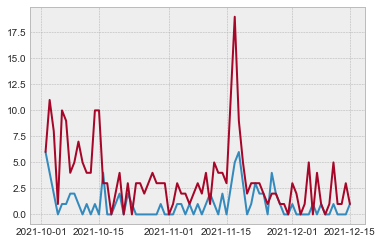

In [434]:

plt.plot(df_all_count[["neu","etc"]])
plt.legend()

In [376]:
## battle ÏòÅÏÉÅÏùò Ï§ëÎ¶Ω - Î∂ÄÏ†ïÎ∂ÄÏ†ï ÎπàÎèÑ ÌôïÏù∏ 

print(df_battle_count.sum())
print (" ----------------------")
print(f"Ï†ÑÏ≤¥ Ï§ë {(1/df_battle_count.sum()[5])*100}%Î•º Ï∞®ÏßÄ")
       

g_pos     54.0
g_neg    120.0
a_pos    183.0
a_neg      5.0
neu       55.0
etc      215.0
dtype: float64
 ----------------------
Ï†ÑÏ≤¥ Ï§ë 0.46511627906976744%Î•º Ï∞®ÏßÄ


In [377]:
## collabo ÏòÅÏÉÅÏùò Ï§ëÎ¶Ω - Î∂ÄÏ†ïÎ∂ÄÏ†ï ÎπàÎèÑ ÌôïÏù∏ 

print(df_collabo_count.sum())
print (" ----------------------")
print(f"Ï†ÑÏ≤¥ Ï§ë {(1/df_collabo_count.sum()[5])*100}%Î•º Ï∞®ÏßÄ")
       

g_pos     51.0
g_neg      1.0
a_pos     72.0
a_neg      3.0
neu      197.0
etc      251.0
dtype: float64
 ----------------------
Ï†ÑÏ≤¥ Ï§ë 0.398406374501992%Î•º Ï∞®ÏßÄ


In [ ]:
df_all_count['neu'] == 

In [423]:
#  Ï§ëÎ¶ΩÏùÑ Í∏çÏ†ïÏúºÎ°ú Í∞ÑÏ£ºÌï† Í≤ΩÏö∞Î•º ÏúÑÌï¥ Ï§ëÎ¶Ω Ïù¥ÏÉÅÏπò Ï†úÍ±∞

# Ïù∏Îç±Ïä§ = 2021-11-16Ïóê Ìï¥ÎãπÎêòÎäî ÏûêÎ£å ÎìúÎûç
df_all_count = df_all_count.drop("2021-11-16")



In [424]:
#  Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑ ÏóêÎü¨ Î∞úÏÉù! ( Ïûò Ï†úÍ±∞Îêå)
df_all_count_test.loc["2021-11-16"]

KeyError: '2021-11-16'

In [378]:
# df_all_countÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
df_all_count.info(0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75 entries, 2021-10-02 to 2021-12-15
Freq: D
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g_pos   75 non-null     int64  
 1   g_neg   75 non-null     float64
 2   a_pos   75 non-null     int64  
 3   a_neg   75 non-null     float64
 4   neu     75 non-null     int64  
 5   etc     75 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 6.2 KB


In [425]:
## score Í≥ÑÏÇ∞
df_all_count['g_score'] = df_all_count['g_pos'] -  df_all_count['g_neg'] + df_all_count["neu"]
df_all_count['a_score'] = df_all_count['a_pos'] -  df_all_count['a_neg'] + df_all_count["neu"]
df_all_count.head()

g_pos  g_neg  a_pos  a_neg  neu  etc  g_score  a_score
datetime                                                          
2021-10-02      9    5.0     11    1.0    6    6     10.0     16.0
2021-10-03      5    2.0      6    1.0    4   11      7.0      9.0
2021-10-04      2    1.0      4    0.0    2    8      3.0      6.0
2021-10-05      1    0.0      4    0.0    0    1      1.0      4.0
2021-10-06      0    5.0      4    0.0    1   10     -4.0      5.0

In [426]:
df_all_count.to_excel('df_all_count.xlsx')

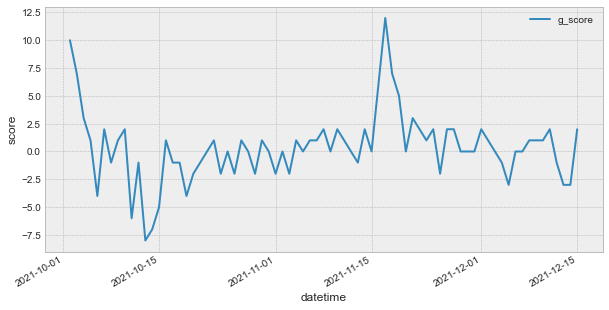

In [427]:
df_all_count['g_score'].plot(figsize=(10,5))

plt.style.use("bmh")

plt.ylabel('score')
plt.legend()

plt.show()

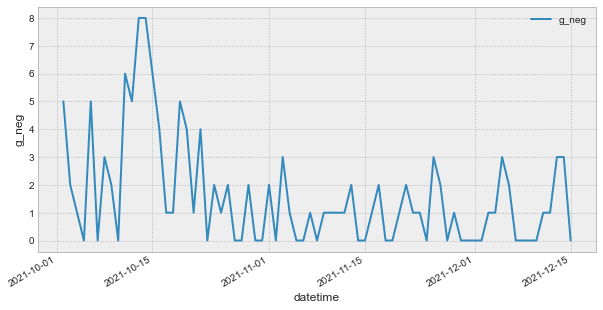

In [428]:
df_all_count['g_neg'].plot(figsize=(10,5))

plt.style.use("bmh")

plt.ylabel('g_neg')
plt.legend()

plt.show()

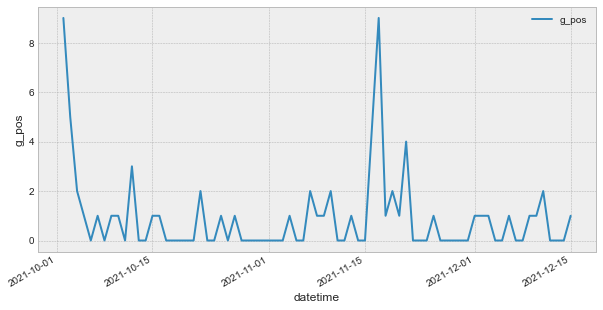

In [430]:
df_all_count['g_pos'].plot(figsize=(10,5))

plt.style.use("bmh")

plt.ylabel('g_pos')
plt.legend()

plt.show()

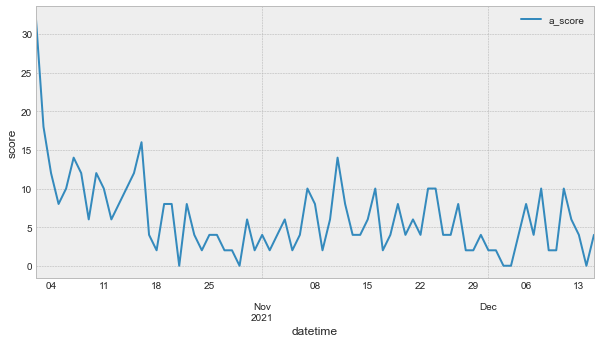

In [403]:
df_all_count['a_score'].plot(figsize=(10,5))

plt.style.use("bmh")

plt.ylabel('score')
plt.legend()


plt.show()

In [200]:
print(len(df_battle))
print(len(df_collabo))

636
581


In [217]:
df_word = df_battle['comment'].str.contains('Ïã¨ÏÇ¨|Î¨¥ÏäπÎ∂Ä|ÌåêÏ†ï|Ïó†ÎÑ∑|ÌîÑÎ°úÎìÄÏÑú').sum()
df_word

60

In [227]:
import math


print(f" Ï†ÑÏ≤¥ Ï∞®ÏßÄ ÎπÑÏú® : {math.floor(df_word/len(df_battle) *100)}%")

 Ï†ÑÏ≤¥ Ï∞®ÏßÄ ÎπÑÏú® : 9%


In [228]:
df_noze = df_collabo['comment'].str.contains('ÎÖ∏Ï†ú').sum()
df_noze

130

In [229]:
df_honey = df_collabo['comment'].str.contains('ÌóàÎãà|ÍøÄ|ÌóàÏ†ú').sum()
df_honey

26

In [231]:
print(f" Ï†ÑÏ≤¥ Ï∞®ÏßÄ ÎπÑÏú® : {math.floor((df_noze+df_honey)/len(df_collabo) *100)}%")

 Ï†ÑÏ≤¥ Ï∞®ÏßÄ ÎπÑÏú® : 26%
